# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load data

## Train data

In [2]:
train = pd.read_csv("C:/Saurabh/My phone/datasets/Credit Card Lead Prediction/train_s3TEQDk.csv")
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [3]:
train.describe(include = 'all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,HZCFC2HJ,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [4]:
train.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [5]:
train.shape

(245725, 11)

In [6]:
data=train.drop('ID', axis=1)

In [7]:
data.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [9]:
data2=data.copy()  

## Test data

In [10]:
test = pd.read_csv('C:/Saurabh/My phone/datasets/Credit Card Lead Prediction/test_mSzZ8RL.csv')
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [11]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

# EDA

## Gender 

In [12]:
data2.Gender.value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

In [13]:
data2.groupby('Gender').Is_Lead.value_counts()

Gender  Is_Lead
Female  0          88823
        1          22705
Male    0          98614
        1          35583
Name: Is_Lead, dtype: int64

Now checking, percentage wise how many people are interested in both the genders?

Is_Lead      0      1
Gender               
Female   88823  22705
Male     98614  35583


<AxesSubplot:xlabel='Gender'>

<Figure size 720x360 with 0 Axes>

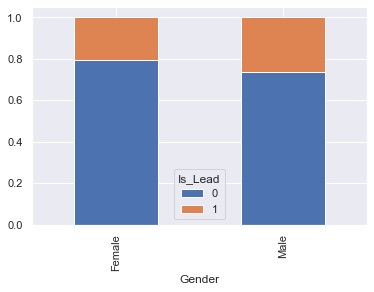

In [14]:
tab = pd.crosstab(data2['Gender'],data2['Is_Lead'])
print(tab)

plt.figure(figsize=[10,5])
tab.div(tab.sum(1), axis = 0).plot(kind = 'bar', stacked =True)

Percentage wise Males are seem to be more inteseted in getting a Credit card.

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Is_Lead'>

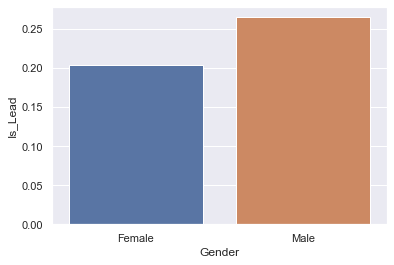

In [15]:
sns.barplot('Gender', 'Is_Lead', data=data2, ci=None)

Males are more likely to show interest.

## Age 

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Is_Lead'>

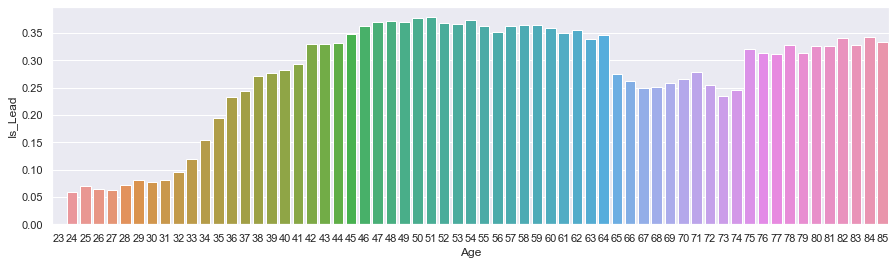

In [16]:
plt.figure(figsize=[15,4])
sns.barplot('Age', 'Is_Lead', data=data2, ci=None)

Making 5 groups in the age 

In [17]:
pd.cut(data2['Age'],5).unique()

[(72.6, 85.0], (22.938, 35.4], (47.8, 60.2], (60.2, 72.6], (35.4, 47.8]]
Categories (5, interval[float64]): [(22.938, 35.4] < (35.4, 47.8] < (47.8, 60.2] < (60.2, 72.6] < (72.6, 85.0]]

In [18]:
age_35 = data2[data2.Age<=35]['Is_Lead']
age_36_48 = data2[(data2.Age>35) & (data2.Age<=48)]['Is_Lead']
age_49_60 = data2[(data2.Age>48) & (data2.Age<=60)]['Is_Lead']
age_61_73 = data2[(data2.Age>60) & (data2.Age<=73)]['Is_Lead']
age_74 = data2[data2.Age>73]['Is_Lead']

<AxesSubplot:>

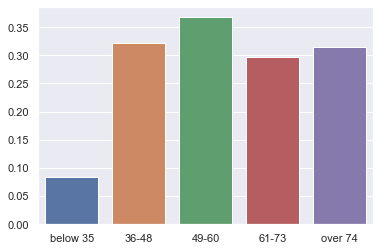

In [19]:
age_col=['below 35', '36-48', '49-60', '61-73', 'over 74']
age_len=[age_35.mean(), age_36_48.mean(), age_49_60.mean(), age_61_73.mean(), age_74.mean()]

sns.barplot(x=age_col, y=age_len)

People from age 36 to 60 are more likely to show interest in getting 

## Reginal code

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'RG268'),
  Text(1, 0, 'RG277'),
  Text(2, 0, 'RG270'),
  Text(3, 0, 'RG282'),
  Text(4, 0, 'RG261'),
  Text(5, 0, 'RG265'),
  Text(6, 0, 'RG283'),
  Text(7, 0, 'RG254'),
  Text(8, 0, 'RG269'),
  Text(9, 0, 'RG257'),
  Text(10, 0, 'RG279'),
  Text(11, 0, 'RG280'),
  Text(12, 0, 'RG252'),
  Text(13, 0, 'RG284'),
  Text(14, 0, 'RG259'),
  Text(15, 0, 'RG281'),
  Text(16, 0, 'RG258'),
  Text(17, 0, 'RG266'),
  Text(18, 0, 'RG260'),
  Text(19, 0, 'RG274'),
  Text(20, 0, 'RG256'),
  Text(21, 0, 'RG275'),
  Text(22, 0, 'RG273'),
  Text(23, 0, 'RG267'),
  Text(24, 0, 'RG272'),
  Text(25, 0, 'RG251'),
  Text(26, 0, 'RG262'),
  Text(27, 0, 'RG264'),
  Text(28, 0, 'RG278'),
  Text(29, 0, 'RG276'),
  Text(30, 0, 'RG263'),
  Text(31, 0, 'RG250'),
  Text(32, 0, 'RG255'),
  Text(33, 0, 'RG253'),
  Text(34, 0, 'RG271')])

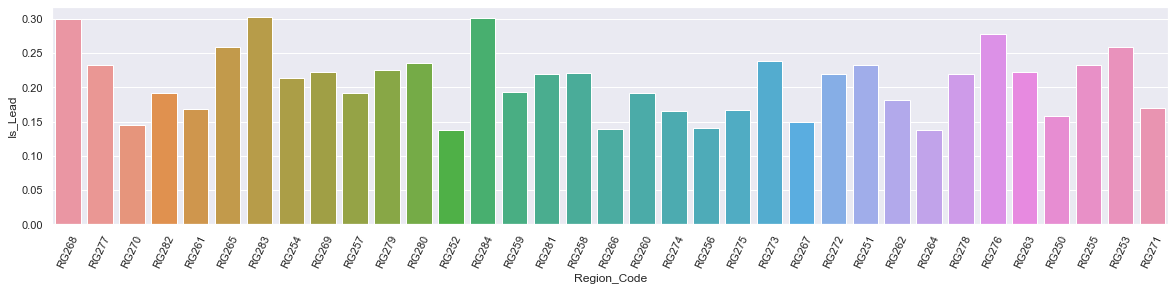

In [20]:
plt.figure(figsize=[20,4])
sns.barplot('Region_Code', 'Is_Lead', data = data2, ci=None)
plt.xticks(rotation = 65)

In [21]:
region_code_df=data2.groupby('Region_Code').Is_Lead.agg(['mean']).sort_values(by='mean', ascending=False).reset_index()
region_code_df.head()

,Region_Code,mean
0,RG283,0.302047
1,RG284,0.301035
2,RG268,0.299800
3,RG276,0.277858
4,RG253,0.258881


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'RG283'),
  Text(1, 0, 'RG284'),
  Text(2, 0, 'RG268'),
  Text(3, 0, 'RG276'),
  Text(4, 0, 'RG253'),
  Text(5, 0, 'RG265'),
  Text(6, 0, 'RG273'),
  Text(7, 0, 'RG280'),
  Text(8, 0, 'RG255'),
  Text(9, 0, 'RG251'),
  Text(10, 0, 'RG277'),
  Text(11, 0, 'RG279'),
  Text(12, 0, 'RG263'),
  Text(13, 0, 'RG269'),
  Text(14, 0, 'RG258'),
  Text(15, 0, 'RG272'),
  Text(16, 0, 'RG278'),
  Text(17, 0, 'RG281'),
  Text(18, 0, 'RG254'),
  Text(19, 0, 'RG259'),
  Text(20, 0, 'RG282'),
  Text(21, 0, 'RG257'),
  Text(22, 0, 'RG260'),
  Text(23, 0, 'RG262'),
  Text(24, 0, 'RG271'),
  Text(25, 0, 'RG261'),
  Text(26, 0, 'RG275'),
  Text(27, 0, 'RG274'),
  Text(28, 0, 'RG250'),
  Text(29, 0, 'RG267'),
  Text(30, 0, 'RG270'),
  Text(31, 0, 'RG256'),
  Text(32, 0, 'RG266'),
  Text(33, 0, 'RG252'),
  Text(34, 0, 'RG264')])

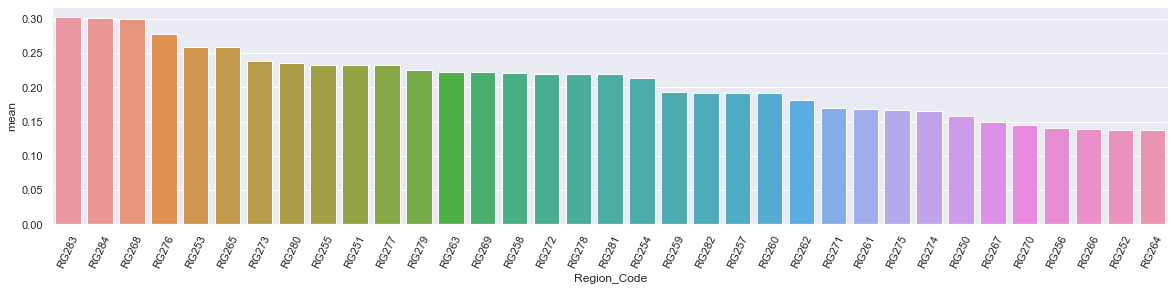

In [22]:
plt.figure(figsize=[20,4])
sns.barplot(x='Region_Code', y='mean', data = region_code_df, ci=None)  #, bins=range(250, 290, 5)
plt.xticks(rotation = 65)

In [23]:
region_code_df['Region_Code'].unique()

array(['RG283', 'RG284', 'RG268', 'RG276', 'RG253', 'RG265', 'RG273',
       'RG280', 'RG255', 'RG251', 'RG277', 'RG279', 'RG263', 'RG269',
       'RG258', 'RG272', 'RG278', 'RG281', 'RG254', 'RG259', 'RG282',
       'RG257', 'RG260', 'RG262', 'RG271', 'RG261', 'RG275', 'RG274',
       'RG250', 'RG267', 'RG270', 'RG256', 'RG266', 'RG252', 'RG264'],
      dtype=object)

Making 5 groups of areas on the basis of their interest of getting the card.

In [24]:
one = '[RG283, RG284, RG268]'
two =  '[RG276, RG253, RG265]'
three = '[RG273, RG280, RG255, RG251, RG277, RG279, RG263, RG269, RG258, RG272, RG278, RG281, RG254]'
four = '[RG259, RG282, RG257, RG260, RG262, RG271, RG261, RG275, RG274, RG250]'
five = '[RG267, RG270, RG256, RG266, RG252, RG264]'

In [25]:
new_area_df=pd.DataFrame()
new_area_df['Areas'] = [one, two, three, four, five]
new_area_df['Is_Lead_mean'] = [region_code_df['mean'][0:3].mean(), \
                               region_code_df['mean'][3:6].mean(), \
                               region_code_df['mean'][6:19].mean(), \
                               region_code_df['mean'][19:29].mean(), \
                               region_code_df['mean'][29:].mean()]

In [26]:
new_area_df['Groups']=['Most interested', 'Average', 'Medium', 'Less interested', 'Least interested']
new_area_df

,Areas,Is_Lead_mean,Groups
0,"[RG283, RG284, RG268]",0.300960,Most interested
1,"[RG276, RG253, RG265]",0.265157,Average
2,"[RG273, RG280, RG255, RG251, RG277, RG279, RG2...",0.225407,Medium
3,"[RG259, RG282, RG257, RG260, RG262, RG271, RG2...",0.177626,Less interested
4,"[RG267, RG270, RG256, RG266, RG252, RG264]",0.141464,Least interested


C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[RG283, RG284, RG268] = Most interested
[RG276, RG253, RG265] = Average
[RG273, RG280, RG255, RG251, RG277, RG279, RG263,
 RG269, RG258, RG272, RG278, RG281, RG254] = Medium
[RG259, RG282, RG257, RG260, RG262, RG271, RG261,
 RG275, RG274, RG250] = Less interested
[RG267, RG270, RG256, RG266, RG252, RG264] = Least interested


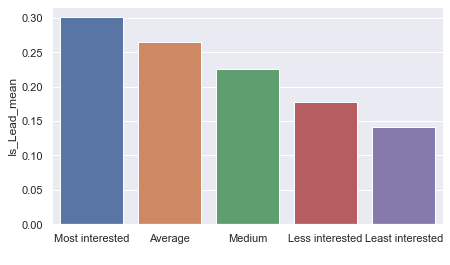

In [27]:
plt.figure(figsize=[7,4])
sns.barplot(new_area_df['Groups'], new_area_df['Is_Lead_mean'], ci=None )
plt.xlabel(' ')
print('[RG283, RG284, RG268] = Most interested')
print('[RG276, RG253, RG265] = Average')
print('[RG273, RG280, RG255, RG251, RG277, RG279, RG263,')
print(' RG269, RG258, RG272, RG278, RG281, RG254] = Medium')
print('[RG259, RG282, RG257, RG260, RG262, RG271, RG261,')
print(' RG275, RG274, RG250] = Less interested')
print('[RG267, RG270, RG256, RG266, RG252, RG264] = Least interested')

1. So from perticular areas people are more likely to be interested.
2. Which are thre areas with the region code RG283, RG284, RG268.

## Occupation

In [28]:
df=data2.copy()

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Is_Lead'>

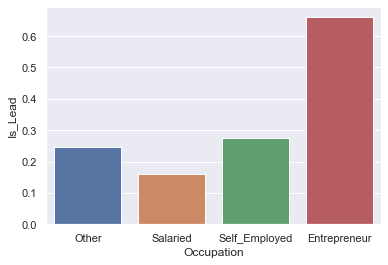

In [29]:
sns.barplot('Occupation', 'Is_Lead', data=df, ci=None)

1. The group who is least likely to show interest is the 'Salaried' one.
2. Entrepreneurs are more likely to show interested in gettind a credit card with a huge margine as compared to others

## Channel code vs Is lead

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Channel_Code', ylabel='Is_Lead'>

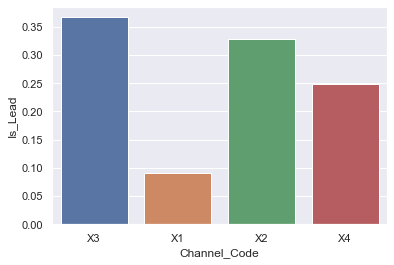

In [30]:
sns.barplot('Channel_Code', 'Is_Lead', data=df, ci=None)

Customers comming from the acquisition channer code X3 and X2 are more likely to get the card.

## Vintage vs Is lead

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 [Text(0, 0, '7'),
  Text(1, 0, '8'),
  Text(2, 0, '9'),
  Text(3, 0, '13'),
  Text(4, 0, '14'),
  Text(5, 0, '15'),
  Text(6, 0, '19'),
  Text(7, 0, '20'),
  Text(8, 0, '21'),
  Text(9, 0, '25'),
  Text(10, 0, '26'),
  Text(11, 0, '27'),
  Text(12, 0, '31'),
  Text(13, 0, '32'),
  Text(14, 0, '33'),
  Text(15, 0, '37'),
  Text(16, 0, '38'),
  Text(17, 0, '39'),
  Text(18, 0, '43'),
  Text(19, 0, '44'),
  Text(20, 0, '45'),
  Text(21, 0, '49'),
  Text(22, 0, '50'),
  Text(23, 0, '51'),
  Text(24, 0, '55'),
  Text(25, 0, '56'),
  Text(26, 0, '57'),
  Text(27, 0, '61'),
  Text(28, 0, '62'),
  Text(29, 0, '63'),
  Text(30, 0, '67'),
  Text(31, 0, '68'),
  Text(32, 0, '69'),
  Text(33, 0, '73'),
 

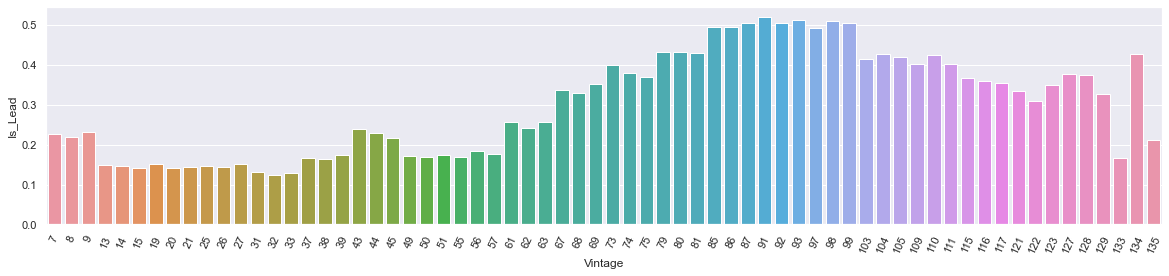

In [31]:
plt.figure(figsize=[20,4])
sns.barplot('Vintage', 'Is_Lead', data=df, ci=None)
plt.xticks(rotation = 65)

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

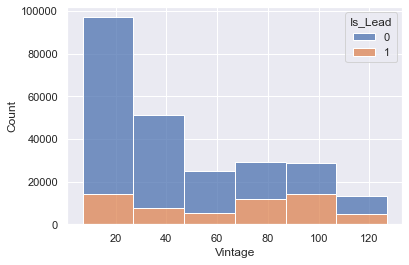

In [32]:
sns.histplot(x='Vintage', data = df, bins=range(7, 135, 20), hue='Is_Lead', multiple="stack")

So the bank has alot of new customers who have joined the bank in last 20 months.

In [33]:
pd.cut(df.Vintage, 5).unique()

[(32.6, 58.2], (6.872, 32.6], (109.4, 135.0], (58.2, 83.8], (83.8, 109.4]]
Categories (5, interval[float64]): [(6.872, 32.6] < (32.6, 58.2] < (58.2, 83.8] < (83.8, 109.4] < (109.4, 135.0]]

In [34]:
vin_33 = df[df.Vintage<=33]['Is_Lead']
vin_34_58 = df[(df.Vintage>33) & (df.Vintage<=58)]['Is_Lead']
vin_59_84 = df[(df.Vintage>58) & (df.Vintage<=84)]['Is_Lead']
vin_85_109 = df[(df.Vintage>84) & (df.Vintage<=109)]['Is_Lead']
vin_110 = df[df.Vintage>110]['Is_Lead']

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

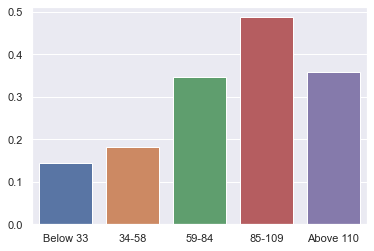

In [35]:
vin_col = ['Below 33', '34-58', '59-84', '85-109', 'Above 110']
vin_len = [vin_33.mean(), vin_34_58.mean(), vin_59_84.mean(), vin_85_109.mean(), vin_110.mean()]

sns.barplot(vin_col, vin_len)

Customers who are with this bank since 85 to 109 months are more likely to show the interest in getting the card.

## Credit product vs Is lead

In [36]:
df.groupby('Credit_Product').Credit_Product.value_counts()

Credit_Product  Credit_Product
No              No                144357
Yes             Yes                72043
Name: Credit_Product, dtype: int64

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Product', ylabel='Is_Lead'>

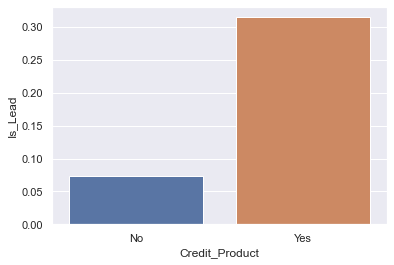

In [37]:
sns.barplot('Credit_Product', 'Is_Lead', data=df, ci=None)

If the customer has any active credit product, they are more willing to get the card.

<AxesSubplot:xlabel='Occupation', ylabel='Is_Lead'>

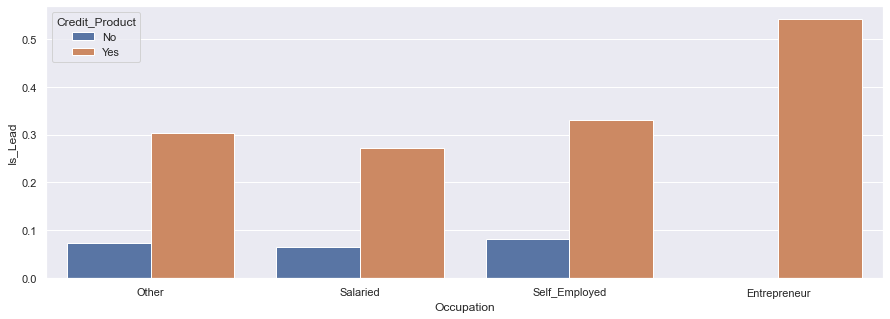

In [38]:
plt.figure(figsize=[15,5])
sns.barplot(x='Occupation', y='Is_Lead', data=df, ci=None, hue='Credit_Product')

Entrepreneurs dosent seem to have any credit product.

## Avg account vs Is lead

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

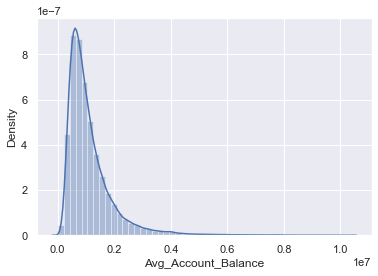

In [39]:
sns.distplot(df['Avg_Account_Balance'])

Removing outliers

In [40]:
q = df['Avg_Account_Balance'].quantile(0.99)
df2 = df[df['Avg_Account_Balance']<q]

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

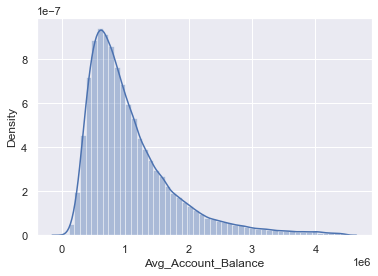

In [41]:
sns.distplot(df2['Avg_Account_Balance']) 

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Is_Lead', ylabel='Avg_Account_Balance'>

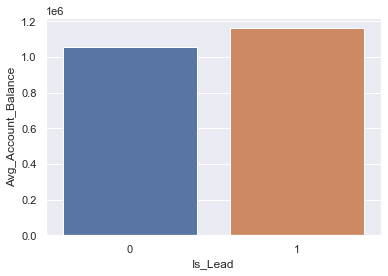

In [42]:
sns.barplot(df2['Is_Lead'], df2['Avg_Account_Balance'], ci=None)

People showing interest are usually the one who has larger Average account balence

## Is active vs Is lead

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Is_Active', ylabel='Is_Lead'>

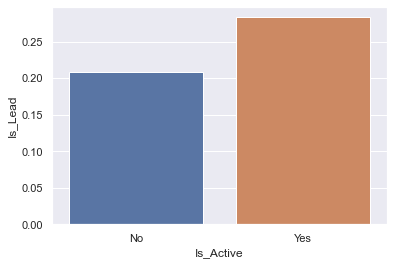

In [43]:
sns.barplot('Is_Active', 'Is_Lead', data=df2, ci=None)

If active in last 3 months then customers are more likely to get the card.

 # Feature engineering

In [44]:
train_df3 = df2.copy()
test_df3 = test.copy()

In [45]:
comb = [train_df3, test_df3]

### Age

In [46]:
for a in comb:
    a.loc[a['Age']<= 35, 'Age_grp'] = 'below 35'
    a.loc[(a['Age']> 35) & (a['Age']<=48), 'Age_grp'] = '36-48'
    a.loc[(a['Age']> 48) & (a['Age']<=60), 'Age_grp'] = '49-60'
    a.loc[(a['Age']> 60) & (a['Age']<=73), 'Age_grp'] = '61-73'
    a.loc[a['Age']> 73, 'Age_grp'] = 'over 74'
    a['Age_grp'] = a['Age_grp'].astype(str)

### Vintage

In [47]:
for a in comb:
    a.loc[a['Vintage']<= 33, 'Vintage_grp'] = 'Below 33'
    a.loc[(a['Vintage']> 33) & (a['Vintage']<= 58), 'Vintage_grp'] = '34-58'
    a.loc[(a['Vintage']> 58) & (a['Vintage']<= 84), 'Vintage_grp'] = '59-84'
    a.loc[(a['Vintage']> 84) & (a['Vintage']<= 109), 'Vintage_grp'] = '85-109'
    a.loc[a['Vintage']> 109, 'Vintage_grp'] = 'Above 110'
    a['Vintage_grp'] = a['Vintage_grp'].astype(str)

### Region Code

In [48]:
for a in comb:
    a['Region_grp'] = a['Region_Code'].map({'RG283':'Most interested', 'RG284':'Most interested',
                                            'RG268':'Most interested', 'RG276':'Average',
                                            'RG253':'Average', 'RG265':'Average', 'RG273':'Medium',
                                            'RG280':'Medium', 'RG255':'Medium', 'RG251':'Medium',
                                            'RG277':'Medium', 'RG279':'Medium', 'RG263':'Medium',
                                            'RG269':'Medium', 'RG258':'Medium', 'RG272':'Medium',
                                            'RG278':'Medium', 'RG281':'Medium', 'RG254':'Medium',
                                            'RG259':'Less interested', 'RG282':'Less interested',
                                            'RG257':'Less interested', 'RG260':'Less interested',
                                            'RG262':'Less interested', 'RG271':'Less interested',
                                            'RG261':'Less interested', 'RG275':'Less interested',
                                            'RG274':'Less interested', 'RG250':'Less interested',
                                            'RG267':'Least interested', 'RG270':'Least interested',
                                            'RG256':'Least interested', 'RG266':'Least interested',
                                            'RG252':'Least interested', 'RG264':'Least interested'})
    a['Region_grp'] = a['Region_grp'].astype(str)

### Occ vs age

In [49]:
age_labels=['below 35', '36-48', '49-60', '61-73', 'over 74']
occ_labels = [ 'Other', 'Salaried', 'Self_Employed', 'Entrepreneur']

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Is_Lead'>

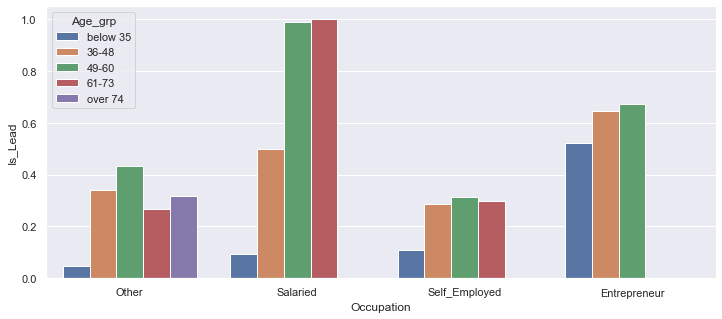

In [50]:
plt.figure(figsize=[12,5])
sns.barplot('Occupation', 'Is_Lead', data=train_df3, hue='Age_grp', hue_order= age_labels, \
            order=occ_labels, ci=None)

### Age vs occ

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


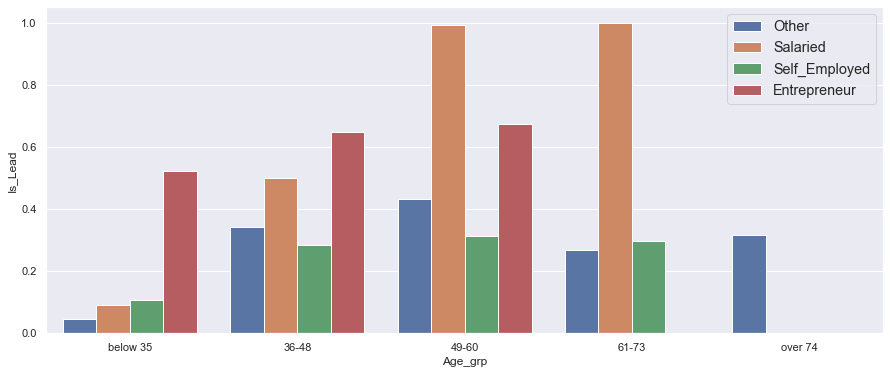

In [51]:
plt.figure(figsize=[15,6])
sns.barplot('Age_grp', 'Is_Lead', data=train_df3, hue='Occupation', hue_order= occ_labels, \
            order= age_labels, ci=None)
plt.legend(loc='upper right', fontsize = 'large')

In [52]:
train_df4 = train_df3.copy()
test_df4 = test_df3.copy()

In [53]:
comb2=[train_df4, test_df4]

In [54]:
for a in comb2:
    a.loc[((a['Age_grp']=='below 35') & (a['Occupation']=='Other')), 'age_occ'] = 'below_35_other'
    a.loc[((a['Age_grp']=='below 35') & (a['Occupation']=='Salaried')), 'age_occ'] = 'below_35_salaried'
    a.loc[((a['Age_grp']=='below 35') & (a['Occupation']=='Self_Employed')), 'age_occ'] = 'below_35_self_employed'
    a.loc[((a['Age_grp']=='below 35') & (a['Occupation']=='Entrepreneur')), 'age_occ'] = 'below_35_entrepreneur'
    a.loc[((a['Age_grp']=='36-48') & (a['Occupation']=='Other')), 'age_occ'] = '36-48_other'
    a.loc[((a['Age_grp']=='36-48') & (a['Occupation']=='Salaried')), 'age_occ'] = '36-48_salaried'
    a.loc[((a['Age_grp']=='36-48') & (a['Occupation']=='Self_Employed')), 'age_occ'] = '36-48_self_employed'
    a.loc[((a['Age_grp']=='36-48') & (a['Occupation']=='Entrepreneur')), 'age_occ'] = '36-48_entrepreneur'
    a.loc[((a['Age_grp']=='49-60') & (a['Occupation']=='Other')), 'age_occ'] = '49-60_other'
    a.loc[((a['Age_grp']=='49-60') & (a['Occupation']=='Salaried')), 'age_occ'] = '49-60_salaried'
    a.loc[((a['Age_grp']=='49-60') & (a['Occupation']=='Self_Employed')), 'age_occ'] = '49-60_self_employed'
    a.loc[((a['Age_grp']=='49-60') & (a['Occupation']=='Entrepreneur')), 'age_occ'] = '49-60_entrepreneur'
    a.loc[((a['Age_grp']=='61-73') & (a['Occupation']=='Other')), 'age_occ'] = '61-73_other'
    a.loc[((a['Age_grp']=='61-73') & (a['Occupation']=='Salaried')), 'age_occ'] = '61-73_salaried'
    a.loc[((a['Age_grp']=='61-73') & (a['Occupation']=='Self_Employed')), 'age_occ'] = '61-73_self_employed'
    a.loc[((a['Age_grp']=='61-73') & (a['Occupation']=='Entrepreneur')), 'age_occ'] = '61-73_entrepreneur'
    a.loc[((a['Age_grp']=='over 74') & (a['Occupation']=='Other')), 'age_occ'] = 'over_74_other'
    a.loc[((a['Age_grp']=='over 74') & (a['Occupation']=='Salaried')), 'age_occ'] = 'over_74_salaried'
    a.loc[((a['Age_grp']=='over 74') & (a['Occupation']=='Self_Employed')), 'age_occ'] = 'over_74_self_employed'
    a.loc[((a['Age_grp']=='over 74') & (a['Occupation']=='Entrepreneur')), 'age_occ'] = 'over_74_entrepreneur'

Text(0, 0.5, 'Is_Lead')

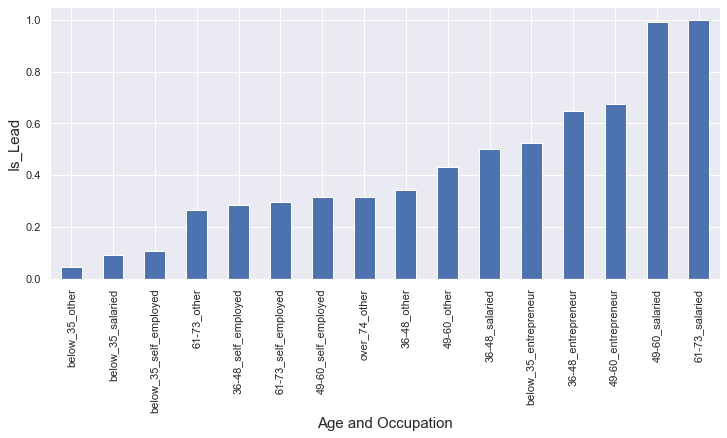

In [55]:
ax_age_occ=train_df4.groupby('age_occ').Is_Lead.agg(['mean']).sort_values('mean').plot(kind='bar',
                                                                                       figsize=[12,5],
                                                                                      legend = False)
ax_age_occ.set_xlabel("Age and Occupation", fontsize=15)
ax_age_occ.set_ylabel("Is_Lead", fontsize=15)

1. All Entrepreneurs below age 60 and Salaried people from age 49 to 73 are more likely to get a Credit card.
2. People with occupation type as salaried, self employed and others below the age 35 are least interested in getting a credit card.


### ChanCo vs age

In [56]:
chan_labels = [ 'X1', 'X2', 'X3', 'X4']

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Channel_Code', ylabel='Is_Lead'>

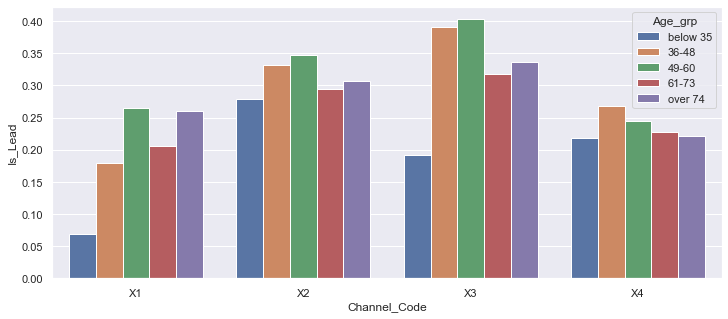

In [57]:
plt.figure(figsize=[12,5])
sns.barplot('Channel_Code', 'Is_Lead', data=train_df4, hue='Age_grp', hue_order= age_labels, \
            order=chan_labels, ci=None)

### Age vs ChanCo

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


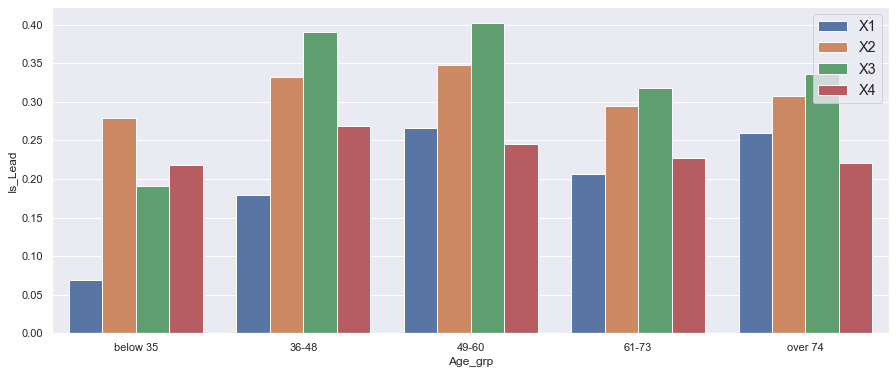

In [58]:
plt.figure(figsize=[15,6])
sns.barplot('Age_grp', 'Is_Lead', data=train_df3, hue='Channel_Code', hue_order= chan_labels, \
            order= age_labels, ci=None)
plt.legend(loc='upper right', fontsize = 'large')

In [59]:
for a in comb2:
    a.loc[((a['Age_grp']=='below 35') & (a['Channel_Code']=='X1')), 'age_chan'] = 'below_35_x1'
    a.loc[((a['Age_grp']=='below 35') & (a['Channel_Code']=='X2')), 'age_chan'] = 'below_35_x2'
    a.loc[((a['Age_grp']=='below 35') & (a['Channel_Code']=='X3')), 'age_chan'] = 'below_35_x3'
    a.loc[((a['Age_grp']=='below 35') & (a['Channel_Code']=='X4')), 'age_chan'] = 'below_35_x4'
    a.loc[((a['Age_grp']=='36-48') & (a['Channel_Code']=='X1')), 'age_chan'] = '36-48_x1'
    a.loc[((a['Age_grp']=='36-48') & (a['Channel_Code']=='X2')), 'age_chan'] = '36-48_x2'
    a.loc[((a['Age_grp']=='36-48') & (a['Channel_Code']=='X3')), 'age_chan'] = '36-48_x3'
    a.loc[((a['Age_grp']=='36-48') & (a['Channel_Code']=='X4')), 'age_chan'] = '36-48_x4'
    a.loc[((a['Age_grp']=='49-60') & (a['Channel_Code']=='X1')), 'age_chan'] = '49-60_x1'
    a.loc[((a['Age_grp']=='49-60') & (a['Channel_Code']=='X2')), 'age_chan'] = '49-60_x2'
    a.loc[((a['Age_grp']=='49-60') & (a['Channel_Code']=='X3')), 'age_chan'] = '49-60_x3'
    a.loc[((a['Age_grp']=='49-60') & (a['Channel_Code']=='X4')), 'age_chan'] = '49-60_x4'
    a.loc[((a['Age_grp']=='61-73') & (a['Channel_Code']=='X1')), 'age_chan'] = '61-73_x1'
    a.loc[((a['Age_grp']=='61-73') & (a['Channel_Code']=='X2')), 'age_chan'] = '61-73_x2'
    a.loc[((a['Age_grp']=='61-73') & (a['Channel_Code']=='X3')), 'age_chan'] = '61-73_x3'
    a.loc[((a['Age_grp']=='61-73') & (a['Channel_Code']=='X4')), 'age_chan'] = '61-73_x4'
    a.loc[((a['Age_grp']=='over 74') & (a['Channel_Code']=='X1')), 'age_chan'] = 'over_x1'
    a.loc[((a['Age_grp']=='over 74') & (a['Channel_Code']=='X2')), 'age_chan'] = 'over_x2'
    a.loc[((a['Age_grp']=='over 74') & (a['Channel_Code']=='X3')), 'age_chan'] = 'over_x3'
    a.loc[((a['Age_grp']=='over 74') & (a['Channel_Code']=='X4')), 'age_chan'] = 'over_x4'

Text(0, 0.5, 'Is_Lead')

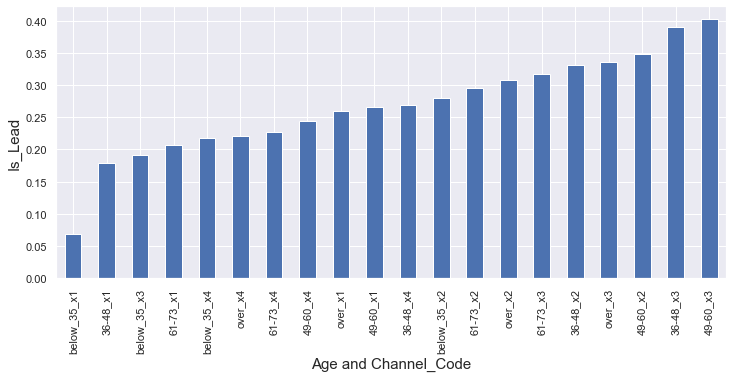

In [60]:
ax_age_chan = train_df4.groupby('age_chan').Is_Lead.agg(['mean']).sort_values('mean').plot(kind='bar',
                                                                                           figsize=[12,5],
                                                                                          legend=False)
ax_age_chan.set_xlabel("Age and Channel_Code", fontsize=15)
ax_age_chan.set_ylabel("Is_Lead", fontsize=15)

1. Customers who are below age 48 coming from X1 acquisition channel and customers who are below age 35 coming from X3 acquisition channel are more likely to get the card.
2. But if a customer from age 36 to 60 is coming from X3 acquisition channel is really less likely to get the credit card.

### Age vs Region code

In [61]:
regc_labels =new_area_df.Groups.to_list()
regc_labels

['Most interested', 'Average', 'Medium', 'Less interested', 'Least interested']

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_grp', ylabel='Is_Lead'>

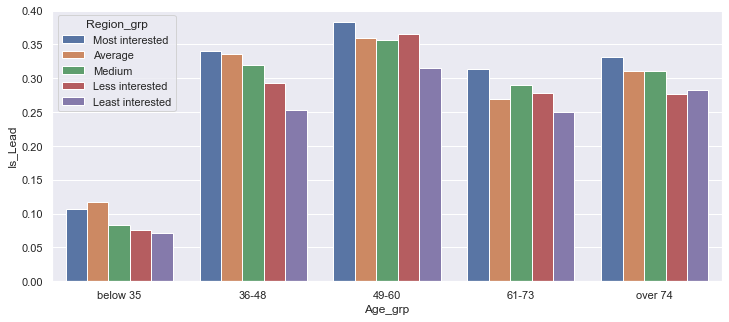

In [62]:
plt.figure(figsize=[12,5])
sns.barplot('Age_grp', 'Is_Lead', data=train_df4, hue='Region_grp', hue_order= regc_labels, \
            order=age_labels, ci=None)

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


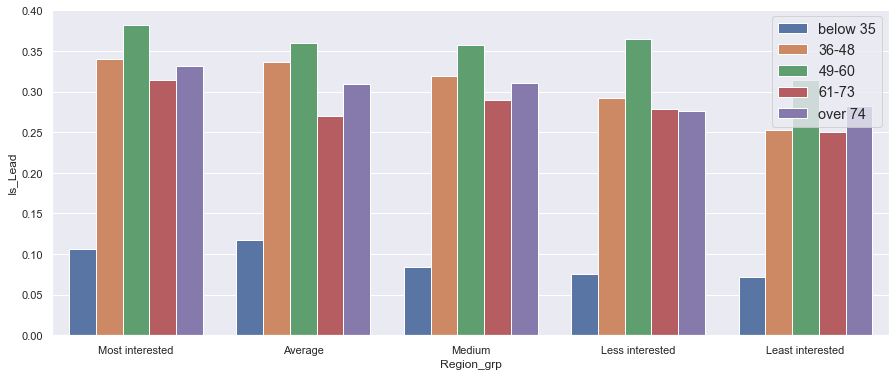

In [63]:
plt.figure(figsize=[15,6])
sns.barplot('Region_grp', 'Is_Lead', data=train_df3, hue='Age_grp', hue_order= age_labels, \
            order= regc_labels, ci=None)
plt.legend(loc='upper right', fontsize = 'large')

In [64]:
for a in comb2:
    a.loc[((a['Age_grp']=='below 35') & (a['Region_grp']=='Most interested')), 'age_reg'] = 'below 35_Most interested'
    a.loc[((a['Age_grp']=='below 35') & (a['Region_grp']=='Average')), 'age_reg'] = 'below 35_Average'
    a.loc[((a['Age_grp']=='below 35') & (a['Region_grp']=='Medium')), 'age_reg'] = 'below 35_Medium'
    a.loc[((a['Age_grp']=='below 35') & (a['Region_grp']=='Less interested')), 'age_reg'] = 'below 35_Less interested'
    a.loc[((a['Age_grp']=='below 35') & (a['Region_grp']=='Least interested')), 'age_reg'] = 'below 35_Least interested'
    a.loc[((a['Age_grp']=='36-48') & (a['Region_grp']=='Most interested')), 'age_reg'] = '36-48_Most interested'
    a.loc[((a['Age_grp']=='36-48') & (a['Region_grp']=='Average')), 'age_reg'] = '36-48_Average'
    a.loc[((a['Age_grp']=='36-48') & (a['Region_grp']=='Medium')), 'age_reg'] = '36-48_Medium'
    a.loc[((a['Age_grp']=='36-48') & (a['Region_grp']=='Less interested')), 'age_reg'] = '36-48_Less interested'
    a.loc[((a['Age_grp']=='36-48') & (a['Region_grp']=='Least interested')), 'age_reg'] = '36-48_Least interested'
    a.loc[((a['Age_grp']=='49-60') & (a['Region_grp']=='Most interested')), 'age_reg'] = '49-60_Most interested'
    a.loc[((a['Age_grp']=='49-60') & (a['Region_grp']=='Average')), 'age_reg'] = '49-60_Average'
    a.loc[((a['Age_grp']=='49-60') & (a['Region_grp']=='Medium')), 'age_reg'] = '49-60_Medium'
    a.loc[((a['Age_grp']=='49-60') & (a['Region_grp']=='Less interested')), 'age_reg'] = '49-60_Less interested'
    a.loc[((a['Age_grp']=='49-60') & (a['Region_grp']=='Least interested')), 'age_reg'] = '49-60_Least interested'
    a.loc[((a['Age_grp']=='61-73') & (a['Region_grp']=='Most interested')), 'age_reg'] = '61-73_Most interested'
    a.loc[((a['Age_grp']=='61-73') & (a['Region_grp']=='Average')), 'age_reg'] = '61-73_Average'
    a.loc[((a['Age_grp']=='61-73') & (a['Region_grp']=='Medium')), 'age_reg'] = '61-73_Medium'
    a.loc[((a['Age_grp']=='61-73') & (a['Region_grp']=='Less interested')), 'age_reg'] = '61-73_Less interested'
    a.loc[((a['Age_grp']=='61-73') & (a['Region_grp']=='Least interested')), 'age_reg'] = '61-73_Least interested'
    a.loc[((a['Age_grp']=='over 74') & (a['Region_grp']=='Most interested')), 'age_reg'] = 'over 74_Most interested'
    a.loc[((a['Age_grp']=='over 74') & (a['Region_grp']=='Average')), 'age_reg'] = 'over 74_Average'
    a.loc[((a['Age_grp']=='over 74') & (a['Region_grp']=='Medium')), 'age_reg'] = 'over 74_Medium'
    a.loc[((a['Age_grp']=='over 74') & (a['Region_grp']=='Less interested')), 'age_reg'] = 'over 74_Less interested'
    a.loc[((a['Age_grp']=='over 74') & (a['Region_grp']=='Least interested')), 'age_reg'] = 'over 74_Least interested'

Text(0, 0.5, 'Is_Lead')

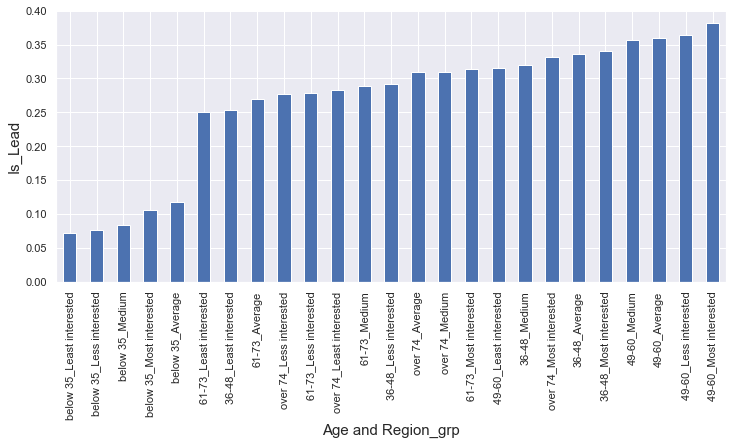

In [65]:
ax_age_reg=train_df4.groupby('age_reg').Is_Lead.agg(['mean']).sort_values('mean').plot(kind='bar',
                                                                                       figsize=[12,5],
                                                                                      legend=False)

ax_age_reg.set_xlabel("Age and Region_grp", fontsize=15)
ax_age_reg.set_ylabel("Is_Lead", fontsize=15)

1. Customer who are below age 35 from all the Region groups are least interested in getting the credit card.
2. Customer who from age 49 to 60 from Region groups Medium, Average, Less interested and Most interested are most interested in getting the credit card.